In [1]:
# Import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
from scipy.stats import wilcoxon

# Import csv of blinks as a dataframe

df = pd.read_csv('StatBlinks_df_all.csv')

In [2]:
# Defining functions


# Collects the blinks from the dataframe for the subjectID input as an int
# Returns a dictionary with the key as the condition and chorus with the
# val as a list of blinks for the 11 trials

def collectBlinks(subjectID):

    subject = df.loc[df['subjectID'] == subjectID]

    # Grouping by condition to collect lists of blinks
    grouped = subject.groupby('description')
    set = {}

    for name, group in grouped:
        a = (group['blinks'].to_list())
        set[name] = a
    
    return set


# Runs statistical analysis with student's t. Compares each condition to all others.
# Creates an array for storing the pval results.
# (dictionary input, alpha level int, boneferroni boolean)

def StatArray(set, alpha, correction='bonferroni'):

    # Creating the initial empty array
    ArrayStat = np.empty([8,8], dtype = float)

    # Conducting two-tailed t test as the null hypothesis is that there is difference between the distributions
    # Each distribution will be compared against all other distributions, including itself
    rowi = 0
    for row in set:

        coli = 0
        pList = []
        for col in set:

            t_statistic, p_value = ttest_ind(set[row], set[col])
            # ArrayStat[rowi, coli] = p_value
            pList.append(p_value)
            
            coli += 1

        # Completes a correction for the row
        p_corrected = multipletests(pList, alpha, method=correction)
       
        ArrayStat[rowi] = p_corrected[1]
        rowi += 1

    return ArrayStat
    

# Runs the wilcoxon nonparametric analysis based on the input set
# Set is the results from the collectBlinks function

def StatArrayWilcoxon(set):

    # Creating the initial empty array
    ArrayStatWil = np.empty([8,8], dtype = float)

    # Conducting wilcoxon for all combinations

    rowi = 0
    for row in set:

        coli = 0
        for col in set:
                
            # Note that wilcoxon fails if the distributions are the exact same
            # A pval of 1 is substituted automatically in that case
            if (coli != rowi):
                stat, p_value = wilcoxon(set[row], set[col])
                
            else:
                p_value = 1
                
            ArrayStatWil[rowi, coli] = p_value
            coli += 1
        
        rowi += 1

    return ArrayStatWil


def SaveStatArray(StatArray, name):
    # Converting StatArray to a dataframe for easy analysis
    df = pd.DataFrame(StatArray)

    # Rename columns and rows for easy analysis
    df.rename(columns={0: 'Imagerychor019', 1: 'Imagerychor038', 2: 'Imagerychor096', 3: 'Imagerychor101',
                4: 'Listeningchor019', 5: 'Listeningchor038', 6: 'Listeningchor096', 7: 'Listeningchor101'}, inplace=True)

    df.rename(columns={0: 'Imagerychor019', 1: 'Imagerychor038', 2: 'Imagerychor096', 3: 'Imagerychor101',
                4: 'Listeningchor019', 5: 'Listeningchor038', 6: 'Listeningchor096', 7: 'Listeningchor101'}, inplace=True)

    # Save to Excel
    df.to_excel('StatBlinks' + name + '.xlsx', index=False)
    

# Creates a basic histogram plot (2X4) of the blink data
def Histplot(subjectID, save = False):
    
    a = collectBlinks(subjectID)

    fig, ax = plt.subplots(2,4, figsize = (12,5))


    i = 0; j = 0 # plot position
    bin_n = [x for x in range(20)] # hist bin lengths

    # Creating plots for all conditions in a subject
    for key in a:

        ax[j,i].hist(a[key], bins = bin_n)
        ax[j,i].title.set_text("" + key)
        # plt.title(''+key)
        i += 1
        
        if (i % 4 == 0):
            i = 0
            j += 1

    # Figure formatting
    fig.supxlabel("Blinks")
    fig.supylabel("Occurences")
    fig.suptitle('Subject'+str(subjectID)+' Distributions')
    fig.tight_layout()

    

    if (save == True):
        plt.savefig("Histplots"+"Subject"+str(subjectID))

    plt.show()

In [3]:
subjectID = 7
a = collectBlinks(subjectID)

print(a)

{'Imagery/chor-019': [3, 4, 6, 2, 1, 3, 2, 8, 0, 5, 7], 'Imagery/chor-038': [18, 14, 19, 13, 20, 17, 12, 4, 19, 14, 5], 'Imagery/chor-096': [0, 6, 14, 2, 17, 4, 14, 15, 6, 13, 22], 'Imagery/chor-101': [5, 4, 1, 4, 8, 1, 0, 3, 7, 9, 7], 'Listening/chor-019': [9, 11, 5, 4, 8, 3, 2, 6, 5, 18, 2], 'Listening/chor-038': [23, 5, 10, 17, 19, 13, 4, 9, 21, 21, 21], 'Listening/chor-096': [13, 9, 18, 9, 18, 3, 6, 10, 21, 12, 22], 'Listening/chor-101': [4, 7, 5, 10, 17, 7, 1, 1, 8, 5, 4]}


In [4]:
alpha = 0.05
b = StatArray(a, alpha)

print(b)

[[1.00000000e+00 1.07624363e-04 6.83952799e-02 1.00000000e+00
  7.01470567e-01 5.53246673e-04 1.76830993e-03 9.40217489e-01]
 [1.07624363e-04 1.00000000e+00 1.00000000e+00 4.17438456e-04
  2.15159779e-02 1.00000000e+00 1.00000000e+00 1.21468342e-02]
 [6.83952799e-02 1.00000000e+00 1.00000000e+00 1.60179527e-01
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 4.17438456e-04 1.60179527e-01 1.00000000e+00
  1.00000000e+00 1.55321608e-03 5.49004348e-03 1.00000000e+00]
 [7.01470567e-01 2.15159779e-02 1.00000000e+00 1.00000000e+00
  1.00000000e+00 3.29533666e-02 1.29871687e-01 1.00000000e+00]
 [5.53246673e-04 1.00000000e+00 1.00000000e+00 1.55321608e-03
  3.29533666e-02 1.00000000e+00 1.00000000e+00 2.08492297e-02]
 [1.76830993e-03 1.00000000e+00 1.00000000e+00 5.49004348e-03
  1.29871687e-01 1.00000000e+00 1.00000000e+00 8.24979636e-02]
 [9.40217489e-01 1.21468342e-02 1.00000000e+00 1.00000000e+00
  1.00000000e+00 2.08492297e-02 8.24979636e-02 1.00000000e+00]]

In [5]:
print(a['Imagery/chor-019'])

[3, 4, 6, 2, 1, 3, 2, 8, 0, 5, 7]


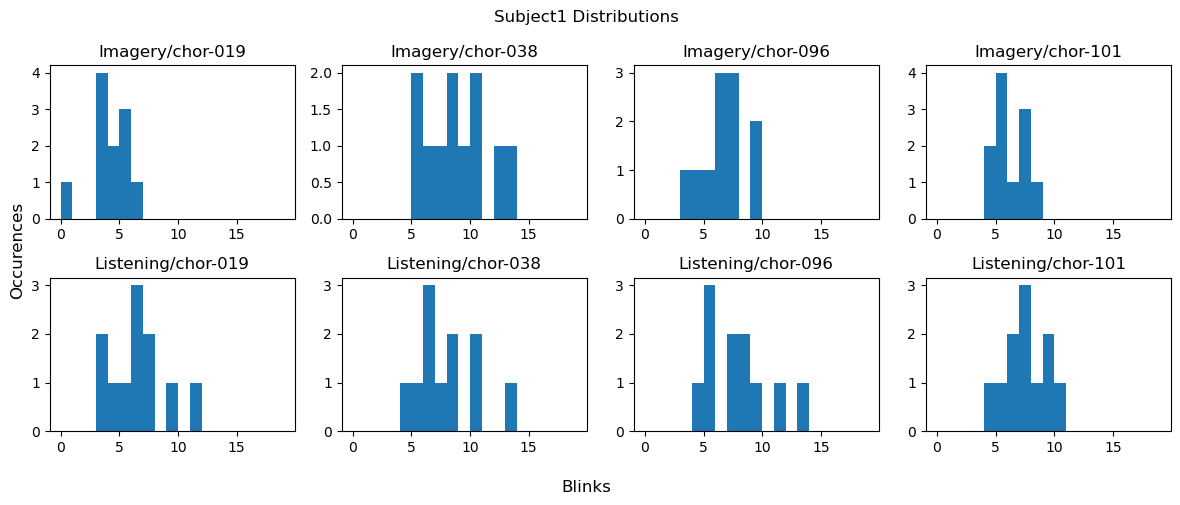

In [6]:
Histplot(1, save = False)

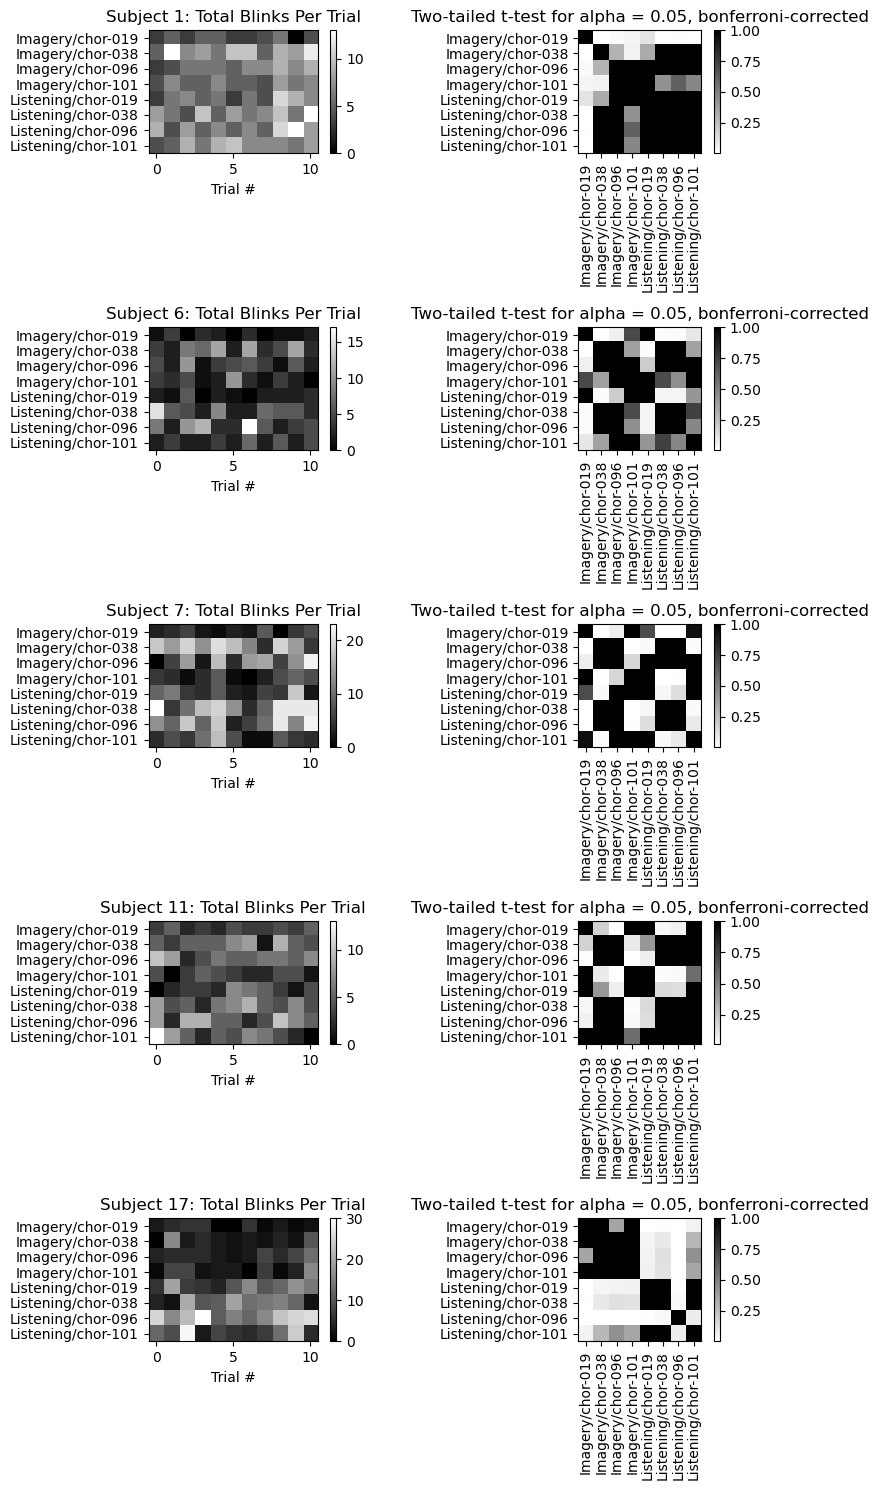

In [7]:
alpha = 0.05
correction = 'bonferroni'
subjects = [1, 6, 7, 11, 17]

i = 1
# Plot the array of total blink counts by condition\trial
fig = plt.figure(figsize=(8, 15))

for subjectID in subjects: 
    a = collectBlinks(subjectID)
    b = StatArray(a, alpha, correction=correction)

    # Combine a's entries into an array
    arr = []
    labels = []
    for cond_chor in a:
        arr.append(a[cond_chor])
        labels.append(cond_chor)

    plt.subplot(len(subjects), 2, i)    

    plt.imshow(arr, cmap='gray')
    plt.yticks(
        ticks = range(len(a)),
        labels = labels,
    )
    plt.colorbar()
    plt.title(f'Subject {subjectID}: Total Blinks Per Trial')
    plt.xlabel('Trial #')

    # Also plot the significance from paired t-tests
    plt.subplot(len(subjects), 2, i+1)

    plt.imshow(
        b,
        cmap = 'binary',
    )
    plt.colorbar()

    plt.title(f'Two-tailed t-test for alpha = {alpha}, {correction}-corrected')
    plt.xticks(
        ticks = range(len(a)),
        labels = labels,
        rotation = 90,
    )
    plt.yticks(
        ticks = range(len(a)),
        labels = labels,
    )
    i += 2


plt.tight_layout()
plt.show()

c:\Users\smb20\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\smb20\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\smb20\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\smb20\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\smb20\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:3414: UserWarni

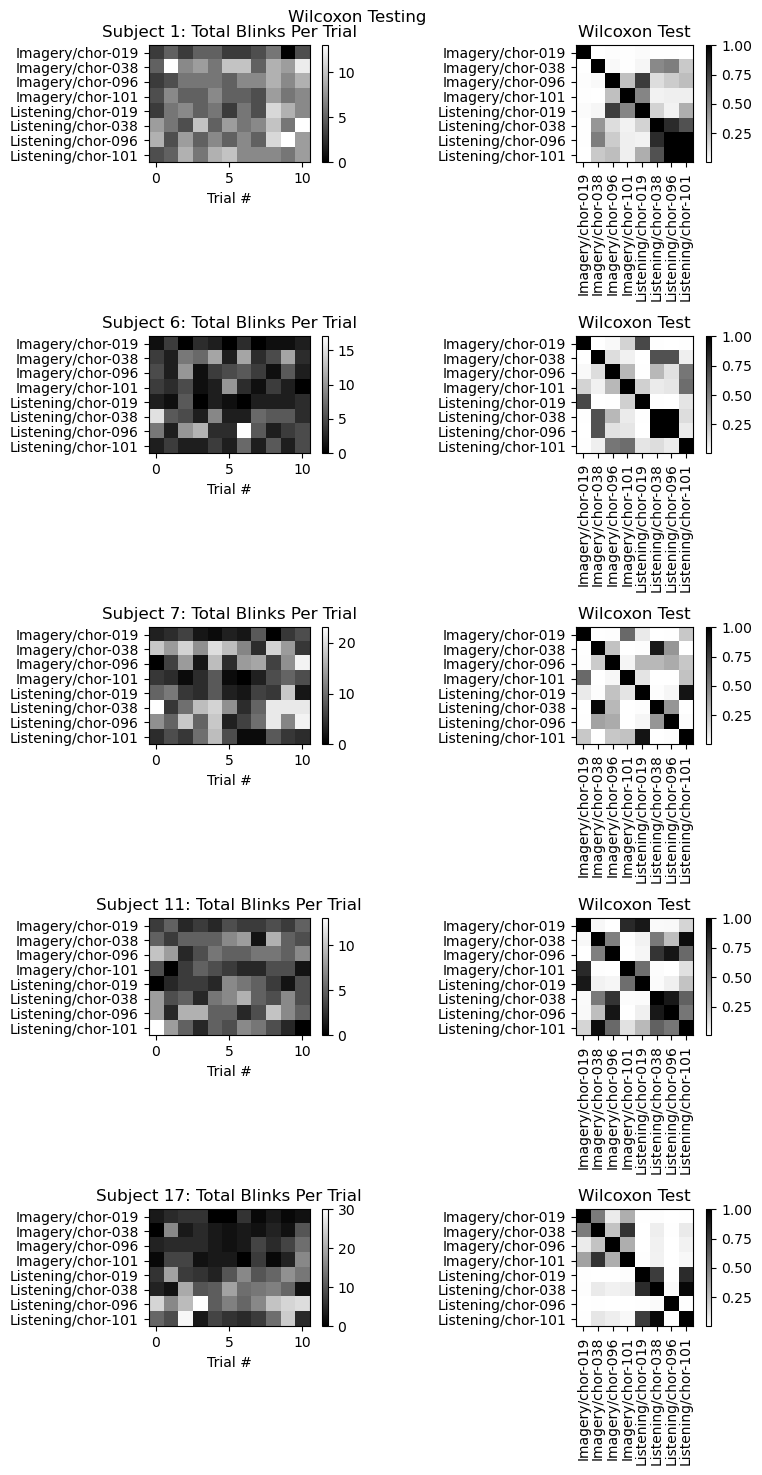

In [8]:
subjects = [1, 6, 7, 11, 17]

i = 1
# Plot the array of total blink counts by condition\trial
fig = plt.figure(figsize=(8, 15))

for subjectID in subjects: 
    a = collectBlinks(subjectID)
    b = StatArrayWilcoxon(a)

    # Combine a's entries into an array
    arr = []
    labels = []
    for cond_chor in a:
        arr.append(a[cond_chor])
        labels.append(cond_chor)

    plt.subplot(len(subjects), 2, i)    

    plt.imshow(arr, cmap='gray')
    plt.yticks(
        ticks = range(len(a)),
        labels = labels,
    )
    plt.colorbar()
    plt.title(f'Subject {subjectID}: Total Blinks Per Trial')
    plt.xlabel('Trial #')

    # Also plot the significance from paired t-tests
    plt.subplot(len(subjects), 2, i+1)

    plt.imshow(
        b,
        cmap = 'binary',
    )
    plt.colorbar()

    plt.title('Wilcoxon Test')
    plt.xticks(
        ticks = range(len(a)),
        labels = labels,
        rotation = 90,
    )
    plt.yticks(
        ticks = range(len(a)),
        labels = labels,
    )
    i += 2

plt.suptitle("Wilcoxon Testing")
plt.tight_layout()
plt.show()

In [9]:
# import pandas as pd
# import seaborn as sns

# alpha = 0.05
# subjects = [1, 6, 7, 11, 17]

# df1 = pd.DataFrame(StatArray(collectBlinks(1), alpha, correction='bonferroni'))
# df2 = pd.DataFrame(StatArray(collectBlinks(6), alpha, correction='bonferroni'))
# df3 = pd.DataFrame(StatArray(collectBlinks(7), alpha, correction='bonferroni'))
# df4 = pd.DataFrame(StatArray(collectBlinks(11), alpha, correction='bonferroni'))
# df5 = pd.DataFrame(StatArray(collectBlinks(17), alpha, correction='bonferroni'))

# # subjects8X = []
# # for id in subjects:
# #     temp = []
# #     temp.append(id)
# #     temp = temp*4 
# #     subjects8X += subjects8X + temp
   

# # Concatenate the 5 dataframes into one dataframe
# df_concat = pd.concat([df1, df2, df3, df4, df5])

# # Create a new column in the concatenated dataframe that contains the subject number for each row
# df_concat['subject'] = pd.Series([1, 2, 3, 4, 5] * 64)

# # Melt the concatenated dataframe so that each row represents a single comparison between two conditions
# df_melted = pd.melt(df_concat, id_vars=['subject'], var_name='comparison', value_name='p_value')

# # Create a new column in the melted dataframe that contains the subject number for each row
# df_melted['subject'] = df_melted['subject'].apply(lambda x: f'Subject {x}')

# df_pivot = df_melted.pivot(index='subject', columns='comparison', values='p_value')

# # Use the seaborn library to create a heatmap of the melted dataframe
# sns.set(font_scale=1.5)
# sns.set_style("whitegrid")
# g = sns.heatmap(df_pivot, cmap='coolwarm', annot=True, cbar_kws={'label': 'p-value'})
# g.set_title('Statistical Significance of 8 Conditions Compared Against Each Other', fontsize=20)
# g.set_xlabel('Comparison')
# g.set_ylabel('Subject')

In [10]:
# Non-parametric, boostrapping, 